## Time series forecasting fundamentals with tensorflow

## Get data

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


## importing time series with pandas

In [1]:
import pandas as pd
df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [2]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [4]:
# How many sample
len(df)

2787

In [5]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


Text(0.5, 1.0, 'Price of Bitcoin')

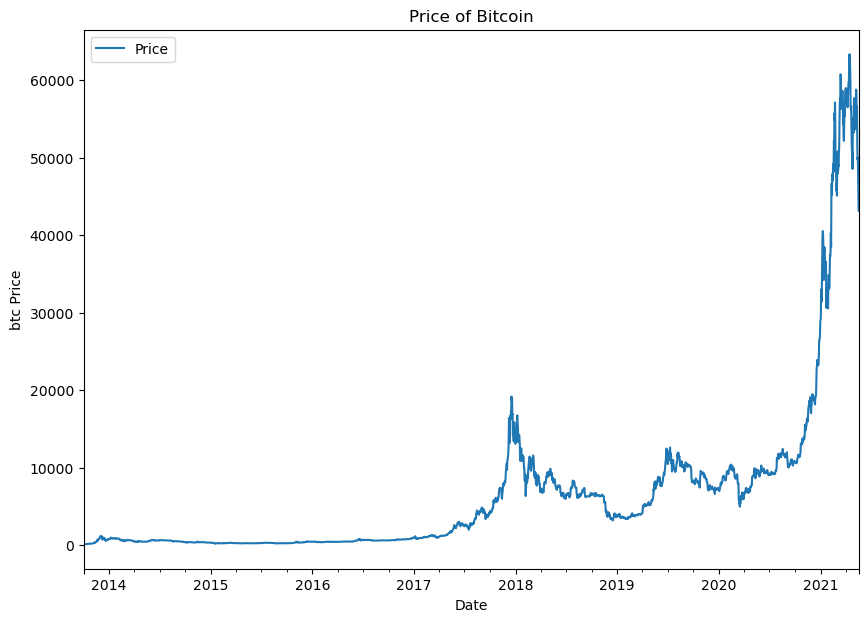

In [6]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("btc Price")
plt.title("Price of Bitcoin")

## Importing time series data with python's csv module

In [7]:
import csv
from datetime import datetime

timesteps = []
btc_price = []

with open("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv") as f:
  csv_reader = csv.reader(f, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
      timesteps.append(datetime.strptime(row[1], "%Y-%m-%d"))
      btc_price.append(float(row[2]))

timesteps[:10], btc_price[:10]


([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 0, 'Date')

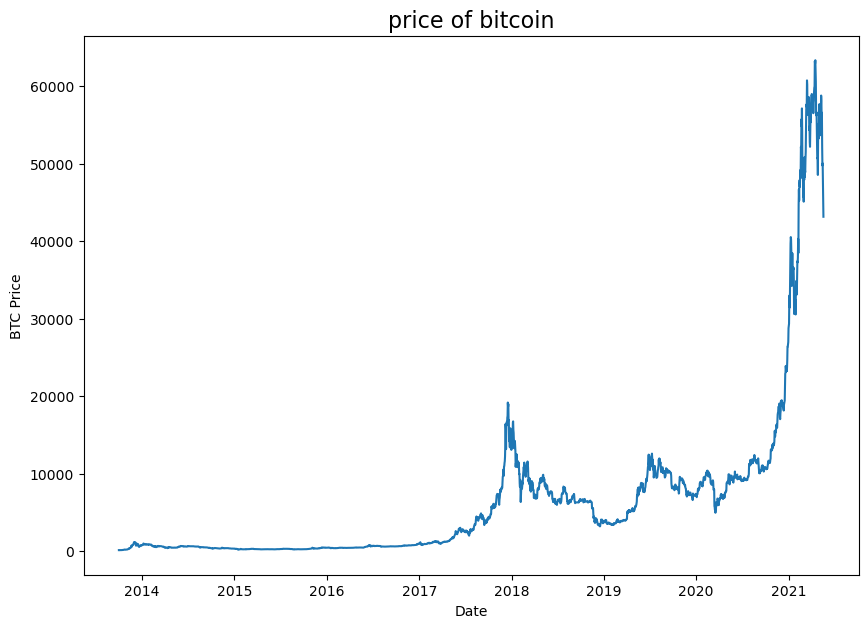

In [8]:
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("price of bitcoin", fontsize=16)
plt.xlabel("Date")

## Format data part 1: Create train and test sets

### the wrong way

In [9]:
from sklearn.model_selection import train_test_split
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(timesteps,
                                                    prices,
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

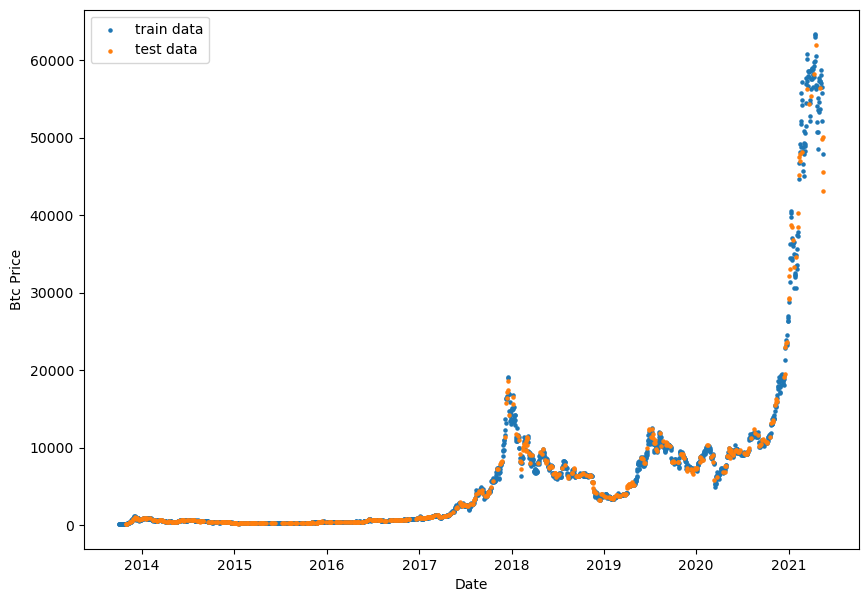

In [11]:
# plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="train data")
plt.scatter(X_test, y_test, s=5, label="test data")
plt.xlabel("Date")
plt.ylabel("Btc Price")
plt.legend()

### the right way

In [12]:
split_size = int(0.8 * len(prices))
X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]
len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

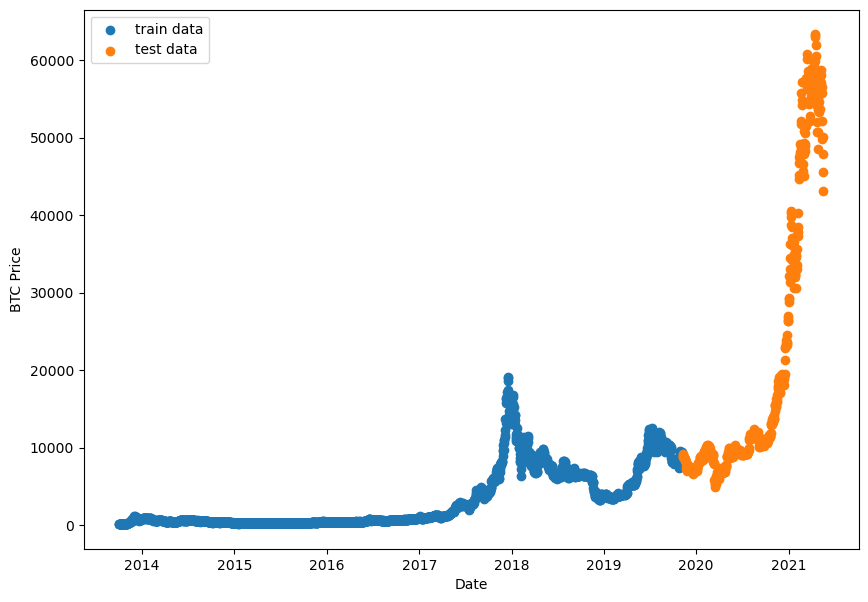

In [13]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, label="train data")
plt.scatter(X_test, y_test, label="test data")
plt.ylabel("BTC Price")
plt.xlabel("Date")
plt.legend()

## Create a plotting function


In [14]:
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)


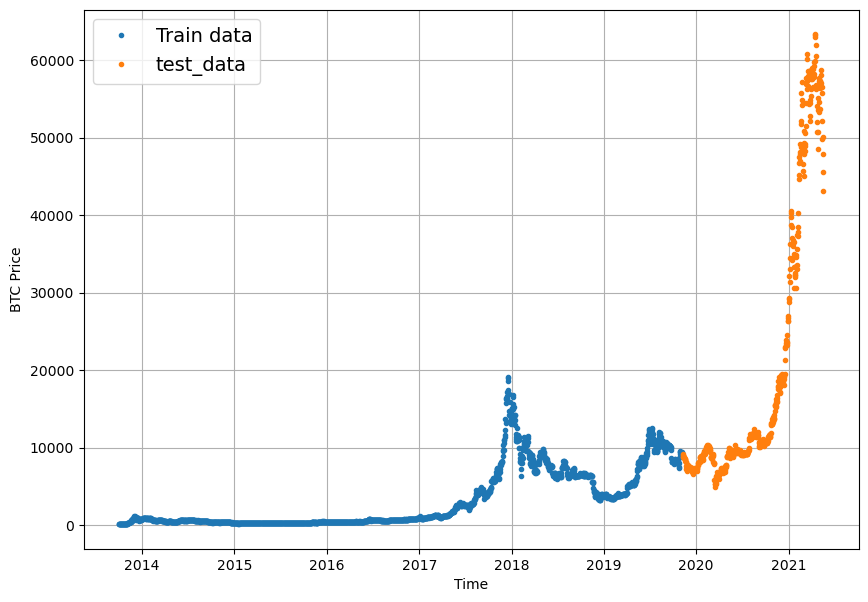

In [15]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="test_data")

## Modelling Experiments

## Model 0: Naive forecast (baseline)

In [16]:
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

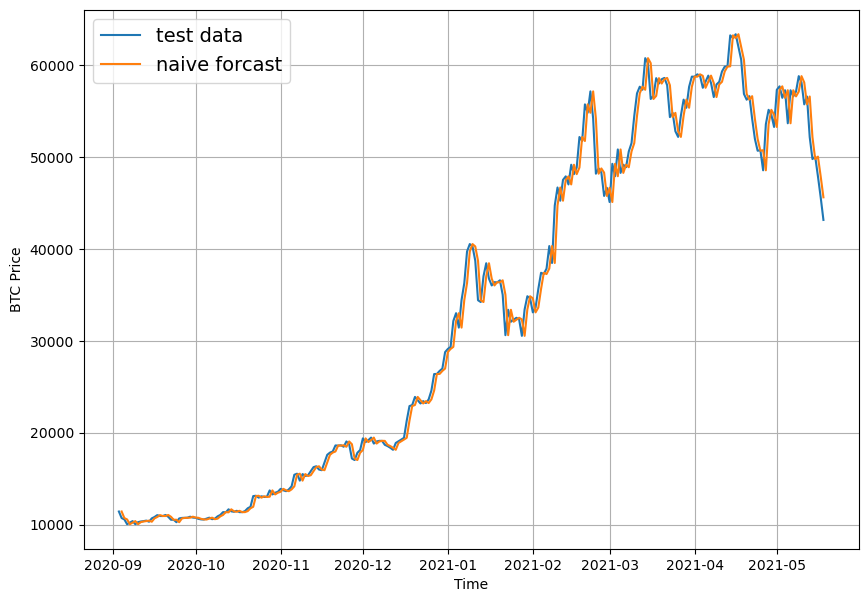

In [17]:
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=X_train, values=y_train, label="train data")
plot_time_series(timesteps=X_test, values=y_test, start=300, format='-', label="test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast,start=300, format='-', label="naive forcast")

## Evaluating a time series model
* MAE
* MSE
* RMSE - root mean square error
* MAPE/sMAPE - (symmetric) mean absolute percentage error
* MASE - mean absolute scaled error


In [18]:
import tensorflow as tf

C:\Users\my pc\.conda\envs\p3\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.12.2 when it was built against 1.12.1, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [19]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae/mae_naive_no_season

In [20]:
mean_absolute_scaled_error(y_test[1:], naive_forecast).numpy()

0.9995699939182626

In [21]:
def evaluation_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)
  metrics = {}
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred).numpy()
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred).numpy()
  mase = mean_absolute_scaled_error(y_true, y_pred).numpy()
  rmse = tf.sqrt(mse).numpy()
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred).numpy()

  metrics["mae"] = mae
  metrics["mse"] = mse
  metrics["mase"] = mase
  metrics["rmse"] = rmse
  metrics["mape"] = mape

  return metrics

In [22]:
naive_results = evaluation_preds(y_test[1:], naive_forecast)

## Format data part2: Windowing our dataset

In [23]:
HORIZON = 1
WINDOW_SIZE = 7


In [24]:
# Create a function to label windowed data
def get_labelled_window(x, horizon=HORIZON):
  return x[:, :-horizon], x[:, -horizon:]

In [25]:
test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8)+1, axis=0))
test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]])>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[8]])>)

In [26]:
btc_windowed = []
for i in range(len(btc_price)):
  btc_windowed.append([btc_price[i:WINDOW_SIZE+i], btc_price[i+WINDOW_SIZE:i+WINDOW_SIZE+HORIZON]])

In [27]:
import numpy as np
# Create a function to view numpy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size+horizon-1)), axis=0).T
  # print(f'window idexes:\n{window_indexes, window_indexes.shape}')

  windowed_array = x[window_indexes]
  # print(windowed_array)
  windows, labels = get_labelled_window(windowed_array, horizon=horizon)
  return windows, labels

In [28]:
full_windows, full_labels = make_windows(prices)
len(full_windows), len(full_labels)

(2780, 2780)

In [29]:
for i in range(3):
  print(f'window:{full_windows[i]} -> horizon:{full_labels[i]}')

window:[123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> horizon:[123.033]
window:[125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> horizon:[124.049]
window:[108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> horizon:[125.96116]


In [30]:
for i in range(3):
  print(f'window:{full_windows[i-3]} -> horizon:{full_labels[i-3]}')

window:[58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> horizon:[47885.62525472]
window:[58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> horizon:[45604.61575361]
window:[55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> horizon:[43144.47129086]


## Turning windows into training and test sets

In [31]:
def make_train_test_splits(windows, labels, test_split=0.2):
  index = int(len(windows) * (1-test_split))
  X_train, y_train = windows[:index], labels[:index]
  X_test, y_test = windows[index:], labels[index:]
  return X_train, X_test, y_train, y_test


In [32]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [33]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [34]:
test_windows[:5], test_windows[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
      

## Make a modelling checkpoint


In [35]:
import os

# Create a function to implement a modelCheckpoint
def create_model_checkpoint(model_name, save_path="model_experiemnts"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=1,
                                            save_best_only=True)

## Model 1: Dense model (window=7, horizon=1)

In [36]:
tf.random.set_seed(42)
inputs = tf.keras.layers.Input(shape=(7,))
x = tf.keras.layers.Dense(128, activation='relu')(inputs)
outputs = tf.keras.layers.Dense(HORIZON)(x)
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7)]               0         
                                                                 
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1153 (4.50 KB)
Trainable params: 1153 (4.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
model_1.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae', "mse"])

In [38]:
history_model_1 = model_1.fit(train_windows,
                              train_labels,
                              epochs=100,
                              verbose=1,
                              batch_size=128,
                              validation_data=(test_windows, test_labels),
                              callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
17/18 [===========================>..] - ETA: 0s - loss: 640.0707 - mae: 640.0707 - mse: 1646511.1250   
Epoch 1: val_loss improved from inf to 951.75604, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 3s 106ms/step - loss: 630.3803 - mae: 630.3803 - mse: 1613481.2500 - val_loss: 951.7560 - val_mae: 951.7560 - val_mse: 3042701.2500
Epoch 2/100
14/18 [======================>.......] - ETA: 0s - loss: 226.0725 - mae: 226.0725 - mse: 214255.8438
Epoch 2: val_loss did not improve from 951.75604
18/18 [==============================] - 0s 10ms/step - loss: 225.9588 - mae: 225.9588 - mse: 211546.3906 - val_loss: 1024.3126 - val_mae: 1024.3126 - val_mse: 3412301.2500
Epoch 3/100
15/18 [========================>.....] - ETA: 0s - loss: 176.9775 - mae: 176.9775 - mse: 154594.1875
Epoch 3: val_loss did not improve from 951.75604
18/18 [==============================] - 0s 16ms/step - loss: 174.4120 - mae: 174.4120 - mse: 156622.3125 - val_loss: 1019.8611 - val_mae: 1019.8611 - val_mse: 2991652.2500
Epoch 4/100
17/18 [===========================>..] - ETA: 0s - loss: 161.8339 - mae: 161.8339 - mse: 141934.9844
Epoch 4: val_loss improved from 951.75604 to

INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 2s 95ms/step - loss: 160.3123 - mae: 160.3123 - mse: 139546.4062 - val_loss: 890.0023 - val_mae: 890.0023 - val_mse: 2553956.5000
Epoch 5/100
13/18 [====================>.........] - ETA: 0s - loss: 157.5479 - mae: 157.5479 - mse: 138283.9375
Epoch 5: val_loss improved from 890.00226 to 852.03387, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 2s 115ms/step - loss: 155.0566 - mae: 155.0566 - mse: 133718.7812 - val_loss: 852.0339 - val_mae: 852.0338 - val_mse: 2437260.5000
Epoch 6/100
18/18 [==============================] - ETA: 0s - loss: 155.4411 - mae: 155.4411 - mse: 130753.5859
Epoch 6: val_loss did not improve from 852.03387
18/18 [==============================] - 0s 6ms/step - loss: 155.4411 - mae: 155.4411 - mse: 130753.5859 - val_loss: 866.1883 - val_mae: 866.1883 - val_mse: 2398546.5000
Epoch 7/100
16/18 [=========================>....] - ETA: 0s - loss: 156.5849 - mae: 156.5849 - mse: 133778.2812
Epoch 7: val_loss improved from 852.03387 to 834.68933, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 2s 115ms/step - loss: 152.8804 - mae: 152.8804 - mse: 126925.3125 - val_loss: 834.6893 - val_mae: 834.6893 - val_mse: 2352790.5000
Epoch 8/100
16/18 [=========================>....] - ETA: 0s - loss: 151.1053 - mae: 151.1053 - mse: 123459.6094
Epoch 8: val_loss improved from 834.68933 to 828.59760, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 48ms/step - loss: 151.5171 - mae: 151.5171 - mse: 123222.6484 - val_loss: 828.5976 - val_mae: 828.5976 - val_mse: 2315357.7500
Epoch 9/100
13/18 [====================>.........] - ETA: 0s - loss: 152.1585 - mae: 152.1585 - mse: 127199.8828
Epoch 9: val_loss did not improve from 828.59760
18/18 [==============================] - 0s 9ms/step - loss: 150.8241 - mae: 150.8241 - mse: 124133.2109 - val_loss: 837.4693 - val_mae: 837.4693 - val_mse: 2207916.5000
Epoch 10/100
13/18 [====================>.........] - ETA: 0s - loss: 141.0268 - mae: 141.0268 - mse: 104037.0938
Epoch 10: val_loss improved from 828.59760 to 785.55957, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 50ms/step - loss: 144.7223 - mae: 144.7223 - mse: 117914.1172 - val_loss: 785.5596 - val_mae: 785.5596 - val_mse: 2069881.3750
Epoch 11/100
18/18 [==============================] - ETA: 0s - loss: 140.9803 - mae: 140.9803 - mse: 111242.0078
Epoch 11: val_loss did not improve from 785.55957
18/18 [==============================] - 0s 25ms/step - loss: 140.9803 - mae: 140.9803 - mse: 111242.0078 - val_loss: 792.6226 - val_mae: 792.6226 - val_mse: 2029412.1250
Epoch 12/100
13/18 [====================>.........] - ETA: 0s - loss: 138.2066 - mae: 138.2066 - mse: 106819.1406
Epoch 12: val_loss did not improve from 785.55957
18/18 [==============================] - 0s 16ms/step - loss: 140.0873 - mae: 140.0873 - mse: 109356.9453 - val_loss: 829.8986 - val_mae: 829.8986 - val_mse: 2096716.8750
Epoch 13/100
17/18 [===========================>..] - ETA: 0s - loss: 140.7845 - mae: 140.7845 - mse: 109795.3516
Epoch 13: val_loss improved from 785.55957 to

INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 59ms/step - loss: 140.3768 - mae: 140.3768 - mse: 108604.6484 - val_loss: 773.8670 - val_mae: 773.8670 - val_mse: 1925682.5000
Epoch 14/100
13/18 [====================>.........] - ETA: 0s - loss: 133.0881 - mae: 133.0881 - mse: 98106.2969
Epoch 14: val_loss improved from 773.86700 to 767.38446, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 63ms/step - loss: 135.4304 - mae: 135.4304 - mse: 104062.5156 - val_loss: 767.3845 - val_mae: 767.3845 - val_mse: 1886358.3750
Epoch 15/100
16/18 [=========================>....] - ETA: 0s - loss: 137.5594 - mae: 137.5594 - mse: 106398.8984
Epoch 15: val_loss improved from 767.38446 to 732.49854, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 77ms/step - loss: 136.0366 - mae: 136.0366 - mse: 102942.4453 - val_loss: 732.4985 - val_mae: 732.4985 - val_mse: 1776320.7500
Epoch 16/100
16/18 [=========================>....] - ETA: 0s - loss: 129.8929 - mae: 129.8929 - mse: 93975.3438
Epoch 16: val_loss did not improve from 732.49854
18/18 [==============================] - 0s 18ms/step - loss: 131.6670 - mae: 131.6670 - mse: 97659.1172 - val_loss: 741.4981 - val_mae: 741.4982 - val_mse: 1774614.5000
Epoch 17/100
13/18 [====================>.........] - ETA: 0s - loss: 131.2159 - mae: 131.2159 - mse: 97270.2344
Epoch 17: val_loss did not improve from 732.49854
18/18 [==============================] - 1s 33ms/step - loss: 129.9304 - mae: 129.9304 - mse: 96412.8594 - val_loss: 745.5101 - val_mae: 745.5101 - val_mse: 1770958.5000
Epoch 18/100
11/18 [=================>............] - ETA: 0s - loss: 133.7402 - mae: 133.7402 - mse: 103692.2734
Epoch 18: val_loss improved from 732.49854 to 704

INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 3s 151ms/step - loss: 129.0706 - mae: 129.0706 - mse: 95988.4062 - val_loss: 704.7582 - val_mae: 704.7582 - val_mse: 1651564.3750
Epoch 19/100
 9/18 [==============>...............] - ETA: 0s - loss: 119.9425 - mae: 119.9425 - mse: 86556.3281
Epoch 19: val_loss did not improve from 704.75818
18/18 [==============================] - 0s 11ms/step - loss: 127.5428 - mae: 127.5428 - mse: 93400.1641 - val_loss: 726.5698 - val_mae: 726.5698 - val_mse: 1688732.3750
Epoch 20/100
11/18 [=================>............] - ETA: 0s - loss: 130.2539 - mae: 130.2539 - mse: 99529.3828 
Epoch 20: val_loss improved from 704.75818 to 693.68231, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 3s 162ms/step - loss: 125.6036 - mae: 125.6036 - mse: 91368.1484 - val_loss: 693.6823 - val_mae: 693.6823 - val_mse: 1658499.8750
Epoch 21/100
17/18 [===========================>..] - ETA: 0s - loss: 128.3571 - mae: 128.3571 - mse: 91568.5625
Epoch 21: val_loss improved from 693.68231 to 690.52429, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 2s 109ms/step - loss: 129.1867 - mae: 129.1867 - mse: 95882.2734 - val_loss: 690.5243 - val_mae: 690.5243 - val_mse: 1572088.8750
Epoch 22/100
11/18 [=================>............] - ETA: 0s - loss: 135.5715 - mae: 135.5715 - mse: 107873.9531
Epoch 22: val_loss did not improve from 690.52429
18/18 [==============================] - 0s 11ms/step - loss: 123.4264 - mae: 123.4264 - mse: 88750.1016 - val_loss: 698.5596 - val_mae: 698.5596 - val_mse: 1582582.1250
Epoch 23/100
11/18 [=================>............] - ETA: 0s - loss: 120.4239 - mae: 120.4239 - mse: 78960.0781
Epoch 23: val_loss improved from 690.52429 to 662.31439, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 75ms/step - loss: 124.1079 - mae: 124.1079 - mse: 87484.8828 - val_loss: 662.3144 - val_mae: 662.3144 - val_mse: 1498891.7500
Epoch 24/100
16/18 [=========================>....] - ETA: 0s - loss: 123.4362 - mae: 123.4362 - mse: 89946.5391
Epoch 24: val_loss did not improve from 662.31439
18/18 [==============================] - 0s 22ms/step - loss: 122.3377 - mae: 122.3377 - mse: 87724.5234 - val_loss: 669.7355 - val_mae: 669.7355 - val_mse: 1494685.8750
Epoch 25/100
18/18 [==============================] - ETA: 0s - loss: 120.3034 - mae: 120.3034 - mse: 85301.8438
Epoch 25: val_loss improved from 662.31439 to 649.64606, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 57ms/step - loss: 120.3034 - mae: 120.3034 - mse: 85301.8438 - val_loss: 649.6461 - val_mae: 649.6461 - val_mse: 1463345.3750
Epoch 26/100
10/18 [===============>..............] - ETA: 0s - loss: 123.0771 - mae: 123.0771 - mse: 79529.8281
Epoch 26: val_loss improved from 649.64606 to 644.69928, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 51ms/step - loss: 120.0568 - mae: 120.0568 - mse: 84490.0547 - val_loss: 644.6993 - val_mae: 644.6993 - val_mse: 1432458.0000
Epoch 27/100
12/18 [===================>..........] - ETA: 0s - loss: 122.7203 - mae: 122.7203 - mse: 87039.7188 
Epoch 27: val_loss improved from 644.69928 to 639.11896, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 82ms/step - loss: 121.2412 - mae: 121.2412 - mse: 84155.0469 - val_loss: 639.1190 - val_mae: 639.1190 - val_mse: 1426022.7500
Epoch 28/100
16/18 [=========================>....] - ETA: 0s - loss: 117.9088 - mae: 117.9088 - mse: 83384.0625
Epoch 28: val_loss improved from 639.11896 to 637.58643, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 78ms/step - loss: 118.6167 - mae: 118.6167 - mse: 82401.7891 - val_loss: 637.5864 - val_mae: 637.5864 - val_mse: 1397113.5000
Epoch 29/100
13/18 [====================>.........] - ETA: 0s - loss: 118.0412 - mae: 118.0412 - mse: 84834.4609
Epoch 29: val_loss did not improve from 637.58643
18/18 [==============================] - 0s 27ms/step - loss: 117.1225 - mae: 117.1225 - mse: 80820.7656 - val_loss: 641.7863 - val_mae: 641.7863 - val_mse: 1396446.0000
Epoch 30/100
15/18 [========================>.....] - ETA: 0s - loss: 125.7321 - mae: 125.7321 - mse: 87148.4141
Epoch 30: val_loss improved from 637.58643 to 625.75671, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 58ms/step - loss: 124.3145 - mae: 124.3145 - mse: 85547.4609 - val_loss: 625.7567 - val_mae: 625.7567 - val_mse: 1371416.3750
Epoch 31/100
 1/18 [>.............................] - ETA: 0s - loss: 124.8900 - mae: 124.8900 - mse: 67013.1250
Epoch 31: val_loss improved from 625.75671 to 622.53162, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 46ms/step - loss: 117.2908 - mae: 117.2908 - mse: 78911.6484 - val_loss: 622.5316 - val_mae: 622.5316 - val_mse: 1349706.6250
Epoch 32/100
13/18 [====================>.........] - ETA: 0s - loss: 118.1981 - mae: 118.1981 - mse: 84735.2109
Epoch 32: val_loss improved from 622.53162 to 619.97534, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 72ms/step - loss: 115.9032 - mae: 115.9032 - mse: 80236.0312 - val_loss: 619.9753 - val_mae: 619.9753 - val_mse: 1342482.8750
Epoch 33/100
17/18 [===========================>..] - ETA: 0s - loss: 118.0958 - mae: 118.0958 - mse: 81638.0156 
Epoch 33: val_loss did not improve from 619.97534
18/18 [==============================] - 0s 7ms/step - loss: 117.0318 - mae: 117.0318 - mse: 80448.8125 - val_loss: 708.1102 - val_mae: 708.1102 - val_mse: 1544000.2500
Epoch 34/100
15/18 [========================>.....] - ETA: 0s - loss: 118.7989 - mae: 118.7989 - mse: 86829.2578 
Epoch 34: val_loss did not improve from 619.97534
18/18 [==============================] - 0s 8ms/step - loss: 119.4716 - mae: 119.4716 - mse: 83007.1328 - val_loss: 622.5682 - val_mae: 622.5682 - val_mse: 1360020.3750
Epoch 35/100
11/18 [=================>............] - ETA: 0s - loss: 117.5088 - mae: 117.5088 - mse: 81557.9766
Epoch 35: val_loss improved from 619.97534 to 610.1

INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 62ms/step - loss: 113.7130 - mae: 113.7130 - mse: 78040.1641 - val_loss: 610.1070 - val_mae: 610.1070 - val_mse: 1319389.5000
Epoch 36/100
17/18 [===========================>..] - ETA: 0s - loss: 117.0182 - mae: 117.0182 - mse: 79869.2812
Epoch 36: val_loss improved from 610.10699 to 606.19135, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 79ms/step - loss: 117.0603 - mae: 117.0603 - mse: 79309.2188 - val_loss: 606.1913 - val_mae: 606.1913 - val_mse: 1301582.7500
Epoch 37/100
18/18 [==============================] - ETA: 0s - loss: 114.7206 - mae: 114.7206 - mse: 78744.5938 
Epoch 37: val_loss did not improve from 606.19135
18/18 [==============================] - 0s 7ms/step - loss: 114.7206 - mae: 114.7206 - mse: 78744.5938 - val_loss: 633.1621 - val_mae: 633.1621 - val_mse: 1346242.5000
Epoch 38/100
13/18 [====================>.........] - ETA: 0s - loss: 114.9755 - mae: 114.9755 - mse: 77625.4531
Epoch 38: val_loss did not improve from 606.19135
18/18 [==============================] - 0s 8ms/step - loss: 114.3686 - mae: 114.3686 - mse: 78046.9219 - val_loss: 630.9755 - val_mae: 630.9755 - val_mse: 1371329.8750
Epoch 39/100
17/18 [===========================>..] - ETA: 0s - loss: 112.6737 - mae: 112.6737 - mse: 76579.5781 
Epoch 39: val_loss improved from 606.19135 to 600.0

INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 54ms/step - loss: 113.2081 - mae: 113.2081 - mse: 76971.7578 - val_loss: 600.0490 - val_mae: 600.0490 - val_mse: 1274686.6250
Epoch 40/100
17/18 [===========================>..] - ETA: 0s - loss: 112.3053 - mae: 112.3053 - mse: 76129.7578
Epoch 40: val_loss did not improve from 600.04901
18/18 [==============================] - 0s 21ms/step - loss: 111.8522 - mae: 111.8522 - mse: 75407.7969 - val_loss: 601.4243 - val_mae: 601.4243 - val_mse: 1287452.7500
Epoch 41/100
 8/18 [============>.................] - ETA: 0s - loss: 125.2739 - mae: 125.2739 - mse: 94294.3672
Epoch 41: val_loss did not improve from 600.04901
18/18 [==============================] - 0s 19ms/step - loss: 112.2263 - mae: 112.2263 - mse: 75622.2578 - val_loss: 621.3235 - val_mae: 621.3235 - val_mse: 1336658.1250
Epoch 42/100
15/18 [========================>.....] - ETA: 0s - loss: 111.5355 - mae: 111.5355 - mse: 72104.7969
Epoch 42: val_loss did not improve from 600.04901
1

INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 67ms/step - loss: 112.8781 - mae: 112.8781 - mse: 76763.1641 - val_loss: 599.8743 - val_mae: 599.8743 - val_mse: 1257301.6250
Epoch 46/100
 9/18 [==============>...............] - ETA: 0s - loss: 116.7665 - mae: 116.7665 - mse: 82521.1562
Epoch 46: val_loss improved from 599.87427 to 588.70563, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 70ms/step - loss: 113.2197 - mae: 113.2197 - mse: 75286.9219 - val_loss: 588.7056 - val_mae: 588.7056 - val_mse: 1237022.6250
Epoch 47/100
10/18 [===============>..............] - ETA: 0s - loss: 108.0979 - mae: 108.0979 - mse: 76744.5156
Epoch 47: val_loss did not improve from 588.70563
18/18 [==============================] - 0s 19ms/step - loss: 113.8521 - mae: 113.8521 - mse: 76427.1328 - val_loss: 654.8636 - val_mae: 654.8636 - val_mse: 1369707.5000
Epoch 48/100
16/18 [=========================>....] - ETA: 0s - loss: 109.0494 - mae: 109.0494 - mse: 74813.0391
Epoch 48: val_loss did not improve from 588.70563
18/18 [==============================] - 0s 15ms/step - loss: 110.3336 - mae: 110.3336 - mse: 73827.1484 - val_loss: 594.6496 - val_mae: 594.6496 - val_mse: 1241989.5000
Epoch 49/100
13/18 [====================>.........] - ETA: 0s - loss: 114.5807 - mae: 114.5807 - mse: 83714.3594 
Epoch 49: val_loss did not improve from 588.70563


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 43ms/step - loss: 111.6733 - mae: 111.6733 - mse: 75358.8203 - val_loss: 583.3865 - val_mae: 583.3865 - val_mse: 1225363.3750
Epoch 53/100
 1/18 [>.............................] - ETA: 0s - loss: 59.9211 - mae: 59.9211 - mse: 21782.9746
Epoch 53: val_loss did not improve from 583.38647
18/18 [==============================] - 0s 5ms/step - loss: 113.4218 - mae: 113.4218 - mse: 75775.8281 - val_loss: 663.9729 - val_mae: 663.9729 - val_mse: 1385511.8750
Epoch 54/100
 1/18 [>.............................] - ETA: 0s - loss: 109.5524 - mae: 109.5524 - mse: 64733.9844
Epoch 54: val_loss did not improve from 583.38647
18/18 [==============================] - 0s 5ms/step - loss: 115.9706 - mae: 115.9706 - mse: 75465.6172 - val_loss: 595.5583 - val_mae: 595.5583 - val_mse: 1237241.2500
Epoch 55/100
 1/18 [>.............................] - ETA: 0s - loss: 128.7346 - mae: 128.7346 - mse: 98011.6797
Epoch 55: val_loss did not improve from 583.38647
18/18

INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 2s 88ms/step - loss: 112.5493 - mae: 112.5493 - mse: 75879.5547 - val_loss: 581.7688 - val_mae: 581.7688 - val_mse: 1207181.3750
Epoch 62/100
 1/18 [>.............................] - ETA: 0s - loss: 74.4845 - mae: 74.4845 - mse: 38318.2266
Epoch 62: val_loss improved from 581.76880 to 576.10272, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 57ms/step - loss: 107.6691 - mae: 107.6691 - mse: 71135.8984 - val_loss: 576.1027 - val_mae: 576.1027 - val_mse: 1203129.8750
Epoch 63/100
17/18 [===========================>..] - ETA: 0s - loss: 110.3831 - mae: 110.3831 - mse: 73168.9375
Epoch 63: val_loss did not improve from 576.10272
18/18 [==============================] - 0s 8ms/step - loss: 110.5876 - mae: 110.5876 - mse: 72930.0312 - val_loss: 632.4243 - val_mae: 632.4243 - val_mse: 1306224.8750
Epoch 64/100
15/18 [========================>.....] - ETA: 0s - loss: 112.0137 - mae: 112.0137 - mse: 71630.4219
Epoch 64: val_loss did not improve from 576.10272
18/18 [==============================] - 0s 13ms/step - loss: 111.3456 - mae: 111.3456 - mse: 73348.5391 - val_loss: 581.4881 - val_mae: 581.4881 - val_mse: 1203848.5000
Epoch 65/100
18/18 [==============================] - ETA: 0s - loss: 109.5018 - mae: 109.5018 - mse: 72333.8828
Epoch 65: val_loss did not improve from 576.10272
18

INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 73ms/step - loss: 108.1684 - mae: 108.1684 - mse: 71442.9141 - val_loss: 571.7665 - val_mae: 571.7665 - val_mse: 1188768.7500
Epoch 67/100
 1/18 [>.............................] - ETA: 0s - loss: 90.0034 - mae: 90.0034 - mse: 50754.7617
Epoch 67: val_loss did not improve from 571.76648
18/18 [==============================] - 0s 5ms/step - loss: 107.0567 - mae: 107.0567 - mse: 70321.9766 - val_loss: 630.2727 - val_mae: 630.2727 - val_mse: 1317019.5000
Epoch 68/100
 1/18 [>.............................] - ETA: 0s - loss: 68.6764 - mae: 68.6764 - mse: 31887.4023
Epoch 68: val_loss did not improve from 571.76648
18/18 [==============================] - 0s 6ms/step - loss: 108.4590 - mae: 108.4590 - mse: 70206.8359 - val_loss: 575.6268 - val_mae: 575.6268 - val_mse: 1199573.8750
Epoch 69/100
 1/18 [>.............................] - ETA: 0s - loss: 92.4989 - mae: 92.4989 - mse: 31267.6914
Epoch 69: val_loss did not improve from 571.76648
18/18 [==

INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 82ms/step - loss: 109.2813 - mae: 109.2813 - mse: 72277.6484 - val_loss: 571.2341 - val_mae: 571.2341 - val_mse: 1186917.2500
Epoch 73/100
 1/18 [>.............................] - ETA: 0s - loss: 122.1858 - mae: 122.1858 - mse: 125246.7891
Epoch 73: val_loss did not improve from 571.23413
18/18 [==============================] - 0s 6ms/step - loss: 113.0991 - mae: 113.0991 - mse: 73693.3594 - val_loss: 656.8831 - val_mae: 656.8831 - val_mse: 1381502.8750
Epoch 74/100
 1/18 [>.............................] - ETA: 0s - loss: 176.5490 - mae: 176.5490 - mse: 182701.9531
Epoch 74: val_loss improved from 571.23413 to 570.61444, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 74ms/step - loss: 107.8937 - mae: 107.8937 - mse: 71523.1719 - val_loss: 570.6144 - val_mae: 570.6144 - val_mse: 1180346.2500
Epoch 75/100
 1/18 [>.............................] - ETA: 0s - loss: 124.8470 - mae: 124.8470 - mse: 64566.5156
Epoch 75: val_loss improved from 570.61444 to 569.85028, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 43ms/step - loss: 108.6846 - mae: 108.6846 - mse: 70982.7891 - val_loss: 569.8503 - val_mae: 569.8503 - val_mse: 1181535.5000
Epoch 76/100
 1/18 [>.............................] - ETA: 0s - loss: 76.4743 - mae: 76.4743 - mse: 25644.2383
Epoch 76: val_loss improved from 569.85028 to 568.13177, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 42ms/step - loss: 110.0794 - mae: 110.0794 - mse: 72124.0156 - val_loss: 568.1318 - val_mae: 568.1318 - val_mse: 1174323.3750
Epoch 77/100
 1/18 [>.............................] - ETA: 0s - loss: 83.7134 - mae: 83.7134 - mse: 62175.9180
Epoch 77: val_loss did not improve from 568.13177
18/18 [==============================] - 0s 4ms/step - loss: 107.8866 - mae: 107.8866 - mse: 70439.0625 - val_loss: 572.4172 - val_mae: 572.4172 - val_mse: 1179606.5000
Epoch 78/100
 1/18 [>.............................] - ETA: 0s - loss: 106.9977 - mae: 106.9977 - mse: 51672.8945
Epoch 78: val_loss did not improve from 568.13177
18/18 [==============================] - 0s 4ms/step - loss: 110.4929 - mae: 110.4929 - mse: 70451.0234 - val_loss: 592.7434 - val_mae: 592.7434 - val_mse: 1228863.5000
Epoch 79/100
 1/18 [>.............................] - ETA: 0s - loss: 108.3533 - mae: 108.3533 - mse: 54232.8750
Epoch 79: val_loss did not improve from 568.13177
18/18

INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 59ms/step - loss: 108.1537 - mae: 108.1537 - mse: 71055.1094 - val_loss: 567.7308 - val_mae: 567.7308 - val_mse: 1171689.5000
Epoch 82/100
 1/18 [>.............................] - ETA: 0s - loss: 191.0213 - mae: 191.0213 - mse: 228793.4688
Epoch 82: val_loss improved from 567.73077 to 567.60217, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 62ms/step - loss: 116.4359 - mae: 116.4359 - mse: 77404.7031 - val_loss: 567.6022 - val_mae: 567.6022 - val_mse: 1172007.3750
Epoch 83/100
 1/18 [>.............................] - ETA: 0s - loss: 105.1265 - mae: 105.1265 - mse: 92199.3281
Epoch 83: val_loss did not improve from 567.60217
18/18 [==============================] - 0s 5ms/step - loss: 114.7756 - mae: 114.7756 - mse: 75567.1875 - val_loss: 645.2111 - val_mae: 645.2111 - val_mse: 1341923.5000
Epoch 84/100
 1/18 [>.............................] - ETA: 0s - loss: 118.1288 - mae: 118.1288 - mse: 86640.8125
Epoch 84: val_loss improved from 567.60217 to 566.59418, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 36ms/step - loss: 113.1700 - mae: 113.1700 - mse: 73612.1484 - val_loss: 566.5942 - val_mae: 566.5942 - val_mse: 1169635.5000
Epoch 85/100
 1/18 [>.............................] - ETA: 0s - loss: 81.6066 - mae: 81.6066 - mse: 35245.6953
Epoch 85: val_loss did not improve from 566.59418
18/18 [==============================] - 0s 4ms/step - loss: 107.5141 - mae: 107.5141 - mse: 71020.5703 - val_loss: 571.2003 - val_mae: 571.2003 - val_mse: 1173223.0000
Epoch 86/100
 1/18 [>.............................] - ETA: 0s - loss: 110.1732 - mae: 110.1732 - mse: 64130.0156
Epoch 86: val_loss improved from 566.59418 to 566.06647, saving model to model_experiemnts\model_1_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 44ms/step - loss: 107.3232 - mae: 107.3232 - mse: 69584.0312 - val_loss: 566.0665 - val_mae: 566.0665 - val_mse: 1166486.3750
Epoch 87/100
 9/18 [==============>...............] - ETA: 0s - loss: 113.0542 - mae: 113.0542 - mse: 82606.0703
Epoch 87: val_loss did not improve from 566.06647
18/18 [==============================] - 0s 9ms/step - loss: 105.7818 - mae: 105.7818 - mse: 69043.8906 - val_loss: 590.5849 - val_mae: 590.5849 - val_mse: 1219434.8750
Epoch 88/100
 1/18 [>.............................] - ETA: 0s - loss: 132.2190 - mae: 132.2190 - mse: 124019.6250
Epoch 88: val_loss did not improve from 566.06647
18/18 [==============================] - 0s 5ms/step - loss: 107.4175 - mae: 107.4175 - mse: 71003.7500 - val_loss: 595.2078 - val_mae: 595.2078 - val_mse: 1232164.8750
Epoch 89/100
 1/18 [>.............................] - ETA: 0s - loss: 107.5069 - mae: 107.5069 - mse: 68146.8047
Epoch 89: val_loss improved from 566.06647 to 565.22

INFO:tensorflow:Assets written to: model_experiemnts\model_1_dense\assets


18/18 [==============================] - 1s 72ms/step - loss: 107.1579 - mae: 107.1579 - mse: 70059.6250 - val_loss: 565.2217 - val_mae: 565.2217 - val_mse: 1164488.2500
Epoch 90/100
 1/18 [>.............................] - ETA: 0s - loss: 121.5187 - mae: 121.5187 - mse: 72580.0234
Epoch 90: val_loss did not improve from 565.22168
18/18 [==============================] - 0s 5ms/step - loss: 105.3495 - mae: 105.3495 - mse: 67441.1719 - val_loss: 583.1727 - val_mae: 583.1727 - val_mse: 1190544.3750
Epoch 91/100
 1/18 [>.............................] - ETA: 0s - loss: 87.4657 - mae: 87.4657 - mse: 28402.6133
Epoch 91: val_loss did not improve from 565.22168
18/18 [==============================] - 0s 5ms/step - loss: 108.8895 - mae: 108.8895 - mse: 71122.5469 - val_loss: 566.3387 - val_mae: 566.3387 - val_mse: 1166828.8750
Epoch 92/100
 1/18 [>.............................] - ETA: 0s - loss: 84.5420 - mae: 84.5420 - mse: 39290.1016
Epoch 92: val_loss did not improve from 565.22168
18/18 [

In [39]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 6ms/step - loss: 648.8908 - mae: 648.8908 - mse: 1324908.5000


[648.8908081054688, 648.8908081054688, 1324908.5]

In [40]:
# Load in the best performing model_1
model_1 = tf.keras.models.load_model("model_experiemnts/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 565.2216 - mae: 565.2216 - mse: 1164488.1250


[565.2216186523438, 565.2216186523438, 1164488.125]

## Making forecasts with a model (on the test dataset)

In [41]:
def make_preds(model, input_data):
    forecast = model.predict(input_data)
    return tf.squeeze(forecast)

In [42]:
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 3ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8866.29 , 8777.148, 9025.37 , 8784.255, 8746.417, 8754.933,
        8676.358, 8523.192, 8469.529, 8524.641], dtype=float32)>)

In [43]:
# Evaluate preds
model_1_results = evaluation_preds(y_true=tf.squeeze(test_labels),
                                y_pred=model_1_preds)
model_1_results

{'mae': 565.22156,
 'mse': 1164488.2,
 'mase': 0.99293774,
 'rmse': 1079.1146,
 'mape': 2.53062}

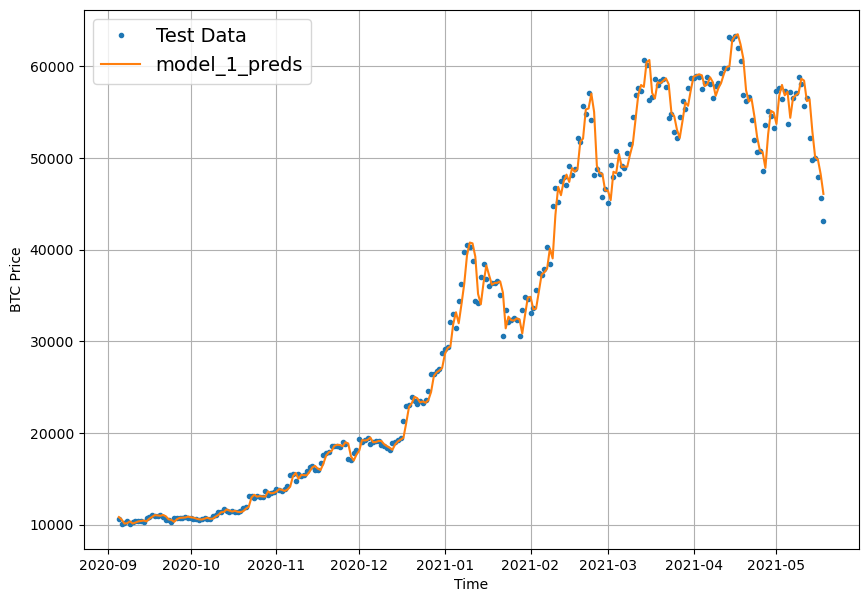

In [44]:
offset=300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")


## Model 2: Dense(window=30, horizon=1)

In [45]:
windows, labels = make_windows(prices, window_size=30, horizon=1)
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows, labels)


In [46]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(1, activation='linear')
], name="model_2_dense")

model_2.compile(loss="mae",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae", "mse"])

history_model_2 = model_2.fit(train_windows,
                             train_labels,
                             validation_data=(test_windows, test_labels),
                             epochs=100,
                             batch_size=128,
                             verbose=0,
                             callbacks=[create_model_checkpoint(model_name=model_2.name)])


Epoch 1: val_loss improved from inf to 3719.57593, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 2: val_loss improved from 3719.57593 to 2109.80615, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 3: val_loss improved from 2109.80615 to 1619.99365, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 4: val_loss improved from 1619.99365 to 1425.96313, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 5: val_loss improved from 1425.96313 to 1308.98938, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 6: val_loss did not improve from 1308.98938

Epoch 7: val_loss improved from 1308.98938 to 1185.19727, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 8: val_loss improved from 1185.19727 to 1098.52405, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 9: val_loss improved from 1098.52405 to 1029.99292, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 10: val_loss improved from 1029.99292 to 1003.34491, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 11: val_loss improved from 1003.34491 to 932.34888, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 12: val_loss did not improve from 932.34888

Epoch 13: val_loss did not improve from 932.34888

Epoch 14: val_loss improved from 932.34888 to 871.22162, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 15: val_loss did not improve from 871.22162

Epoch 16: val_loss did not improve from 871.22162

Epoch 17: val_loss did not improve from 871.22162

Epoch 18: val_loss did not improve from 871.22162

Epoch 19: val_loss improved from 871.22162 to 848.98602, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 20: val_loss did not improve from 848.98602

Epoch 21: val_loss improved from 848.98602 to 848.47351, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 22: val_loss improved from 848.47351 to 763.77319, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 23: val_loss did not improve from 763.77319

Epoch 24: val_loss did not improve from 763.77319

Epoch 25: val_loss did not improve from 763.77319

Epoch 26: val_loss improved from 763.77319 to 756.27350, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 27: val_loss did not improve from 756.27350

Epoch 28: val_loss did not improve from 756.27350

Epoch 29: val_loss improved from 756.27350 to 721.34235, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 30: val_loss did not improve from 721.34235

Epoch 31: val_loss improved from 721.34235 to 718.52448, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 32: val_loss did not improve from 718.52448

Epoch 33: val_loss improved from 718.52448 to 705.89734, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 34: val_loss improved from 705.89734 to 703.85522, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 35: val_loss did not improve from 703.85522

Epoch 36: val_loss improved from 703.85522 to 696.30591, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 37: val_loss did not improve from 696.30591

Epoch 38: val_loss did not improve from 696.30591

Epoch 39: val_loss improved from 696.30591 to 679.92383, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 40: val_loss did not improve from 679.92383

Epoch 41: val_loss improved from 679.92383 to 678.35199, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 42: val_loss did not improve from 678.35199

Epoch 43: val_loss did not improve from 678.35199

Epoch 44: val_loss improved from 678.35199 to 677.42822, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 45: val_loss did not improve from 677.42822

Epoch 46: val_loss did not improve from 677.42822

Epoch 47: val_loss did not improve from 677.42822

Epoch 48: val_loss improved from 677.42822 to 666.92200, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 49: val_loss improved from 666.92200 to 654.22272, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 50: val_loss did not improve from 654.22272

Epoch 51: val_loss did not improve from 654.22272

Epoch 52: val_loss improved from 654.22272 to 653.03467, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 53: val_loss did not improve from 653.03467

Epoch 54: val_loss did not improve from 653.03467

Epoch 55: val_loss did not improve from 653.03467

Epoch 56: val_loss improved from 653.03467 to 646.92242, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 57: val_loss did not improve from 646.92242

Epoch 58: val_loss did not improve from 646.92242

Epoch 59: val_loss did not improve from 646.92242

Epoch 60: val_loss did not improve from 646.92242

Epoch 61: val_loss did not improve from 646.92242

Epoch 62: val_loss did not improve from 646.92242

Epoch 63: val_loss did not improve from 646.92242

Epoch 64: val_loss did not improve from 646.92242

Epoch 65: val_loss improved from 646.92242 to 643.91785, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 66: val_loss improved from 643.91785 to 643.35065, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 67: val_loss improved from 643.35065 to 637.57373, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 68: val_loss did not improve from 637.57373

Epoch 69: val_loss did not improve from 637.57373

Epoch 70: val_loss did not improve from 637.57373

Epoch 71: val_loss did not improve from 637.57373

Epoch 72: val_loss improved from 637.57373 to 634.41394, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 73: val_loss did not improve from 634.41394

Epoch 74: val_loss did not improve from 634.41394

Epoch 75: val_loss did not improve from 634.41394

Epoch 76: val_loss did not improve from 634.41394

Epoch 77: val_loss did not improve from 634.41394

Epoch 78: val_loss did not improve from 634.41394

Epoch 79: val_loss did not improve from 634.41394

Epoch 80: val_loss did not improve from 634.41394

Epoch 81: val_loss improved from 634.41394 to 618.77557, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 82: val_loss did not improve from 618.77557

Epoch 83: val_loss did not improve from 618.77557

Epoch 84: val_loss did not improve from 618.77557

Epoch 85: val_loss did not improve from 618.77557

Epoch 86: val_loss did not improve from 618.77557

Epoch 87: val_loss did not improve from 618.77557

Epoch 88: val_loss did not improve from 618.77557

Epoch 89: val_loss did not improve from 618.77557

Epoch 90: val_loss did not improve from 618.77557

Epoch 91: val_loss improved from 618.77557 to 612.29382, saving model to model_experiemnts\model_2_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_2_dense\assets



Epoch 92: val_loss did not improve from 612.29382

Epoch 93: val_loss did not improve from 612.29382

Epoch 94: val_loss did not improve from 612.29382

Epoch 95: val_loss did not improve from 612.29382

Epoch 96: val_loss did not improve from 612.29382

Epoch 97: val_loss did not improve from 612.29382

Epoch 98: val_loss did not improve from 612.29382

Epoch 99: val_loss did not improve from 612.29382

Epoch 100: val_loss did not improve from 612.29382


In [47]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 675.4012 - mae: 675.4012 - mse: 1479708.7500


[675.4012451171875, 675.4012451171875, 1479708.75]

In [48]:
model_2 = tf.keras.models.load_model("model_experiemnts/model_2_dense/")

In [49]:
model_2_preds = make_preds(model_2, input_data=test_windows)

18/18 [==============================] - 0s 2ms/step


In [50]:
model_2_results = evaluation_preds(y_true=tf.squeeze(test_labels),
                                y_pred=model_2_preds)

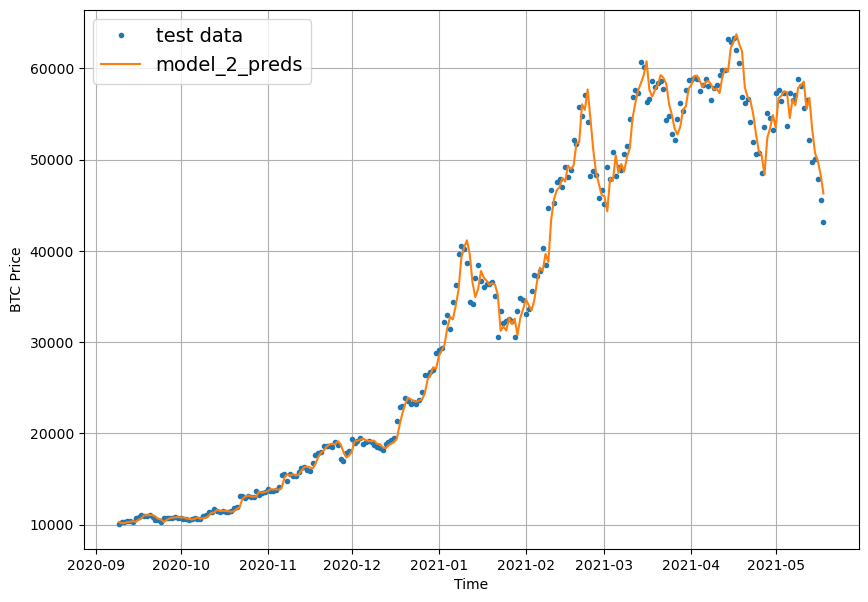

In [51]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset,format="-", label="model_2_preds")


## Model 3: Dense(window=30, horizon=7)

In [52]:
HORIZON = 7
WINDOW_SIZE = 30
windows, labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows, labels)

In [53]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss='mae',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae", "mse"])

history_model_3 = model_3.fit(train_windows,
                             train_labels,
                             epochs=100,
                             batch_size=128,
                              verbose=0,
                             validation_data=(test_windows, test_labels),
                             callbacks=[create_model_checkpoint(model_name=model_3.name)])


Epoch 1: val_loss improved from inf to 4146.07080, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 2: val_loss improved from 4146.07080 to 2171.78101, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 3: val_loss improved from 2171.78101 to 2030.90564, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 4: val_loss improved from 2030.90564 to 1907.42041, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 5: val_loss did not improve from 1907.42041

Epoch 6: val_loss improved from 1907.42041 to 1730.26440, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 7: val_loss improved from 1730.26440 to 1590.99316, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 8: val_loss improved from 1590.99316 to 1585.50122, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 9: val_loss did not improve from 1585.50122

Epoch 10: val_loss improved from 1585.50122 to 1572.72681, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 11: val_loss improved from 1572.72681 to 1487.24707, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 12: val_loss did not improve from 1487.24707

Epoch 13: val_loss improved from 1487.24707 to 1452.70715, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 14: val_loss improved from 1452.70715 to 1449.47107, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 15: val_loss did not improve from 1449.47107

Epoch 16: val_loss did not improve from 1449.47107

Epoch 17: val_loss did not improve from 1449.47107

Epoch 18: val_loss did not improve from 1449.47107

Epoch 19: val_loss did not improve from 1449.47107

Epoch 20: val_loss improved from 1449.47107 to 1428.00159, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 21: val_loss did not improve from 1428.00159

Epoch 22: val_loss improved from 1428.00159 to 1414.75769, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 23: val_loss improved from 1414.75769 to 1370.09021, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 24: val_loss did not improve from 1370.09021

Epoch 25: val_loss did not improve from 1370.09021

Epoch 26: val_loss did not improve from 1370.09021

Epoch 27: val_loss did not improve from 1370.09021

Epoch 28: val_loss did not improve from 1370.09021

Epoch 29: val_loss did not improve from 1370.09021

Epoch 30: val_loss did not improve from 1370.09021

Epoch 31: val_loss improved from 1370.09021 to 1339.06262, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 32: val_loss improved from 1339.06262 to 1334.33252, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 33: val_loss did not improve from 1334.33252

Epoch 34: val_loss did not improve from 1334.33252

Epoch 35: val_loss did not improve from 1334.33252

Epoch 36: val_loss did not improve from 1334.33252

Epoch 37: val_loss did not improve from 1334.33252

Epoch 38: val_loss did not improve from 1334.33252

Epoch 39: val_loss did not improve from 1334.33252

Epoch 40: val_loss did not improve from 1334.33252

Epoch 41: val_loss did not improve from 1334.33252

Epoch 42: val_loss improved from 1334.33252 to 1312.70923, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 43: val_loss improved from 1312.70923 to 1298.56091, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 44: val_loss did not improve from 1298.56091

Epoch 45: val_loss did not improve from 1298.56091

Epoch 46: val_loss did not improve from 1298.56091

Epoch 47: val_loss did not improve from 1298.56091

Epoch 48: val_loss did not improve from 1298.56091

Epoch 49: val_loss did not improve from 1298.56091

Epoch 50: val_loss did not improve from 1298.56091

Epoch 51: val_loss did not improve from 1298.56091

Epoch 52: val_loss did not improve from 1298.56091

Epoch 53: val_loss improved from 1298.56091 to 1290.74915, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 54: val_loss did not improve from 1290.74915

Epoch 55: val_loss did not improve from 1290.74915

Epoch 56: val_loss did not improve from 1290.74915

Epoch 57: val_loss did not improve from 1290.74915

Epoch 58: val_loss did not improve from 1290.74915

Epoch 59: val_loss improved from 1290.74915 to 1279.28748, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 60: val_loss improved from 1279.28748 to 1278.14380, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 61: val_loss did not improve from 1278.14380

Epoch 62: val_loss did not improve from 1278.14380

Epoch 63: val_loss did not improve from 1278.14380

Epoch 64: val_loss improved from 1278.14380 to 1265.83789, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 65: val_loss did not improve from 1265.83789

Epoch 66: val_loss did not improve from 1265.83789

Epoch 67: val_loss did not improve from 1265.83789

Epoch 68: val_loss did not improve from 1265.83789

Epoch 69: val_loss did not improve from 1265.83789

Epoch 70: val_loss did not improve from 1265.83789

Epoch 71: val_loss did not improve from 1265.83789

Epoch 72: val_loss improved from 1265.83789 to 1257.25586, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 73: val_loss improved from 1257.25586 to 1244.30505, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 74: val_loss did not improve from 1244.30505

Epoch 75: val_loss did not improve from 1244.30505

Epoch 76: val_loss did not improve from 1244.30505

Epoch 77: val_loss did not improve from 1244.30505

Epoch 78: val_loss did not improve from 1244.30505

Epoch 79: val_loss did not improve from 1244.30505

Epoch 80: val_loss did not improve from 1244.30505

Epoch 81: val_loss did not improve from 1244.30505

Epoch 82: val_loss did not improve from 1244.30505

Epoch 83: val_loss did not improve from 1244.30505

Epoch 84: val_loss did not improve from 1244.30505

Epoch 85: val_loss did not improve from 1244.30505

Epoch 86: val_loss did not improve from 1244.30505

Epoch 87: val_loss did not improve from 1244.30505

Epoch 88: val_loss did not improve from 1244.30505

Epoch 89: val_loss did not improve from 1244.30505

Epoch 90: val_loss did not improve from 1244.30505

Epoch 91: val_loss did not improve from 1244.30505

Epoch 92: val_loss improved from 1244.30505 to 1236.09058, savi

INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets



Epoch 93: val_loss did not improve from 1236.09058

Epoch 94: val_loss did not improve from 1236.09058

Epoch 95: val_loss did not improve from 1236.09058

Epoch 96: val_loss did not improve from 1236.09058

Epoch 97: val_loss did not improve from 1236.09058

Epoch 98: val_loss did not improve from 1236.09058

Epoch 99: val_loss did not improve from 1236.09058

Epoch 100: val_loss did not improve from 1236.09058


In [54]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 6ms/step - loss: 1361.7949 - mae: 1361.7949 - mse: 5910636.0000


[1361.794921875, 1361.794921875, 5910636.0]

In [55]:
model_3 = tf.keras.models.load_model("model_experiemnts/model_3_dense")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1236.0906 - mae: 1236.0906 - mse: 5418488.5000


[1236.090576171875, 1236.090576171875, 5418488.5]

In [56]:
model_3_preds = make_preds(model_3, 
                          input_data=test_windows)

18/18 [==============================] - 0s 3ms/step


## Make our evaluation function work for larger horizons

In [64]:
def evaluation_preds(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)
    metrics = {}
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    if mae.ndim > 0:
        mae = tf.reduce_mean(mae)
        mse = tf.reduce_mean(mse)
        mase = tf.reduce_mean(mase)
        rmse = tf.reduce_mean(rmse)
        mape = tf.reduce_mean(mape)

    metrics["mae"] = mae.numpy()
    metrics["mse"] = mse.numpy()
    metrics["mase"] = mase.numpy()
    metrics["rmse"] = rmse.numpy()
    metrics["mape"] = mape.numpy()
    

    return metrics

In [65]:
# Get moddel_3 results aggregated to single values
model_3_results = evaluation_preds(y_true=tf.squeeze(test_labels),
                                  y_pred=model_3_preds)
model_3_results

{'mae': 1236.0906,
 'mse': 5418488.5,
 'mase': 2.1995537,
 'rmse': 1421.8954,
 'mape': 5.6683087}

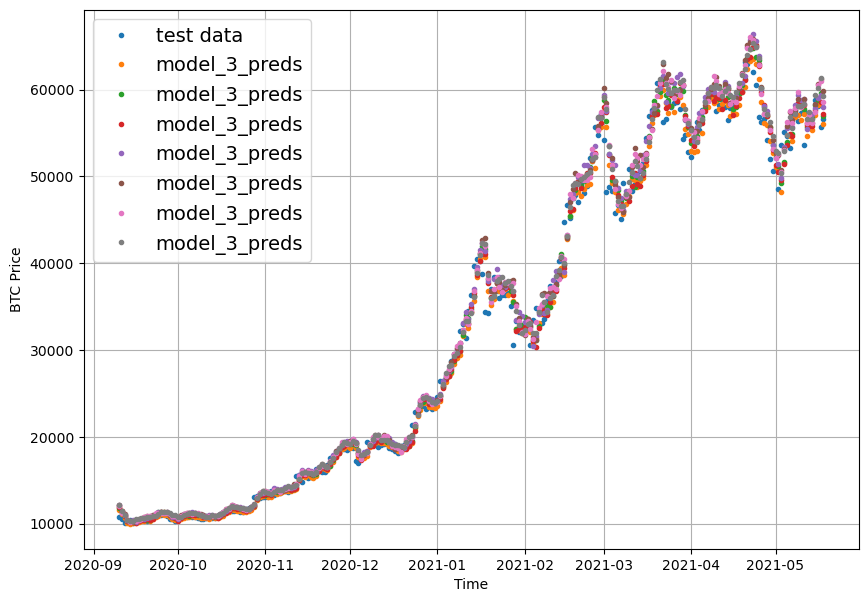

In [66]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

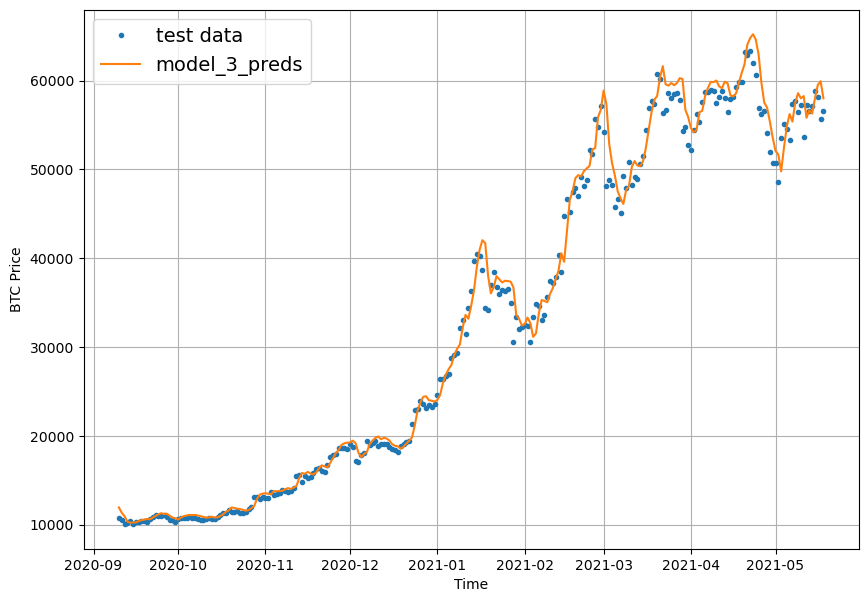

In [67]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset,  label="test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=tf.reduce_mean(model_3_preds, axis=1),format="-", start=offset, label="model_3_preds")

## the best model so far

<Axes: >

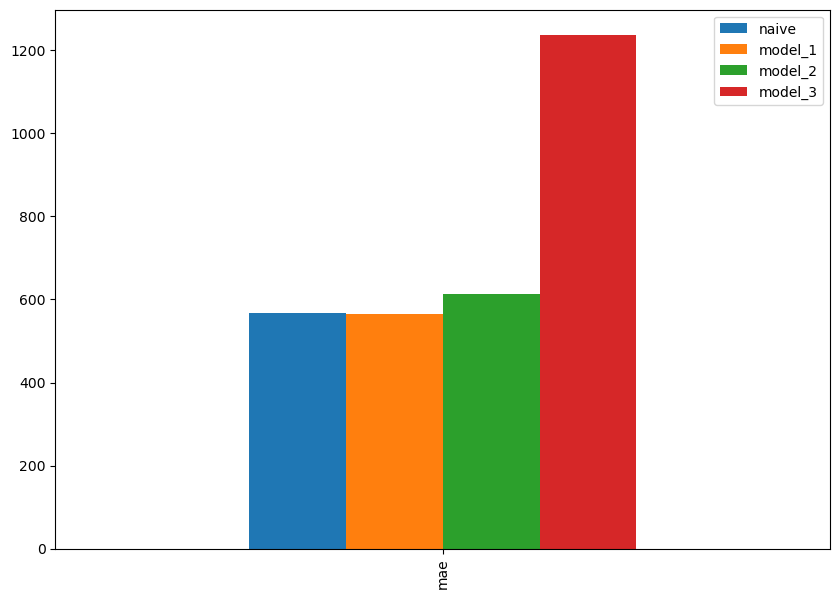

In [68]:
pd.DataFrame({"naive":naive_results["mae"],
             "model_1":model_1_results["mae"],
             "model_2":model_2_results["mae"],
             "model_3":model_3_results['mae']}, index=['mae']).plot(figsize=(10, 7), kind='bar')

## Model 4: Conv1D

In [70]:
HORIZON = 1
WINDOW_SIZE = 7


In [71]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [73]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2224, 2224, 556, 556)

In [74]:
train_windows[0].shape

(7,)

In [75]:
# before we pass our data to the conv1d layer we have to reshape it
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [77]:
expand_dims_layer = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))

In [79]:
# Test out our lambda layer
print(f'original shape:{x.shape}')
print(f'expanded shape:{expand_dims_layer(x).shape}')
print(expand_dims_layer(x))

original shape:(7,)
expanded shape:(7, 1)
tf.Tensor(
[[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]], shape=(7, 1), dtype=float32)


In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x:tf.expand_dims(x, axis=1)),
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation='relu'),
    tf.keras.layers.Dense(HORIZON)
], name="model_4")

model_4.compile(loss="mae",
               optimizer=tf.keras.optimizers.Adam())

history_model_4 = model_4.fit(train_windows, 
                             train_labels, 
                             epochs=100,
                             validation_data=(test_windows, test_labels),
                             callbacks=[create_model_checkpoint(model_name=model_3.name)])

Epoch 1/100
65/70 [==========================>...] - ETA: 0s - loss: 919.4094 
Epoch 1: val_loss improved from inf to 1194.06860, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


70/70 [==============================] - 2s 16ms/step - loss: 871.2382 - val_loss: 1194.0686
Epoch 2/100
56/70 [=======================>......] - ETA: 0s - loss: 194.2719
Epoch 2: val_loss improved from 1194.06860 to 1108.15601, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


70/70 [==============================] - 1s 13ms/step - loss: 191.8431 - val_loss: 1108.1560
Epoch 3/100
61/70 [=========================>....] - ETA: 0s - loss: 184.9818
Epoch 3: val_loss improved from 1108.15601 to 1046.01074, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


70/70 [==============================] - 2s 24ms/step - loss: 182.2641 - val_loss: 1046.0107
Epoch 4/100
50/70 [====================>.........] - ETA: 0s - loss: 181.8575
Epoch 4: val_loss improved from 1046.01074 to 908.66278, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


70/70 [==============================] - 1s 16ms/step - loss: 172.9514 - val_loss: 908.6628
Epoch 5/100
59/70 [========================>.....] - ETA: 0s - loss: 168.8029
Epoch 5: val_loss did not improve from 908.66278
70/70 [==============================] - 0s 6ms/step - loss: 163.7749 - val_loss: 965.2668
Epoch 6/100
63/70 [==========================>...] - ETA: 0s - loss: 147.9167
Epoch 6: val_loss improved from 908.66278 to 804.30859, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


70/70 [==============================] - 2s 24ms/step - loss: 149.7338 - val_loss: 804.3086
Epoch 7/100
64/70 [==========================>...] - ETA: 0s - loss: 149.9957
Epoch 7: val_loss improved from 804.30859 to 772.73389, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


70/70 [==============================] - 2s 25ms/step - loss: 145.6953 - val_loss: 772.7339
Epoch 8/100
53/70 [=====================>........] - ETA: 0s - loss: 142.7192
Epoch 8: val_loss improved from 772.73389 to 739.38434, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


70/70 [==============================] - 1s 17ms/step - loss: 142.3495 - val_loss: 739.3843
Epoch 9/100
57/70 [=======================>......] - ETA: 0s - loss: 136.3003
Epoch 9: val_loss did not improve from 739.38434
70/70 [==============================] - 1s 8ms/step - loss: 136.5791 - val_loss: 1107.2167
Epoch 10/100
67/70 [===========================>..] - ETA: 0s - loss: 146.1617
Epoch 10: val_loss improved from 739.38434 to 694.98944, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


70/70 [==============================] - 2s 26ms/step - loss: 145.9832 - val_loss: 694.9894
Epoch 11/100
69/70 [============================>.] - ETA: 0s - loss: 131.6695
Epoch 11: val_loss did not improve from 694.98944
70/70 [==============================] - 0s 4ms/step - loss: 131.1140 - val_loss: 861.1820
Epoch 12/100
58/70 [=======================>......] - ETA: 0s - loss: 137.2438
Epoch 12: val_loss improved from 694.98944 to 652.04913, saving model to model_experiemnts\model_3_dense
INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


INFO:tensorflow:Assets written to: model_experiemnts\model_3_dense\assets


70/70 [==============================] - 2s 30ms/step - loss: 134.9171 - val_loss: 652.0491
Epoch 13/100
63/70 [==========================>...] - ETA: 0s - loss: 119.5839
Epoch 13: val_loss did not improve from 652.04913
70/70 [==============================] - 0s 4ms/step - loss: 120.9268 - val_loss: 722.9713
Epoch 14/100
65/70 [==========================>...] - ETA: 0s - loss: 124.0019
Epoch 14: val_loss did not improve from 652.04913
70/70 [==============================] - 0s 6ms/step - loss: 128.8254 - val_loss: 940.7182
Epoch 15/100
